# **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes de um shopping
feito por (Luciano Galdino).

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [32]:
import numpy as np
import pandas as pd

In [33]:
#biblioteca que retira as mensagens de atencao

import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('Mall_Customers.csv',
                    sep=',', encoding='iso-8859-1')

In [35]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**ATRIBUTOS:**

CustomerID: identificação do cliente.

Genre: Gênero.

Age: idade.

Annual Income (k$):	Rendimento anual.

Spending Score (1 a 100): Pontuação de gastos.

**IDADE**

In [36]:
import plotly.express as px

In [37]:
# montando um histograma de idade
hist =  px.histogram (df,  x = "Age", nbins=60)
hist.update_layout(width=600,height=400,title_text='Distribuição das idades')
hist.show()

**GÊNERO**

In [38]:
# Verificando a frequencia do genero
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [39]:
# verificando a frequencia de pontuacao de gastos
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

In [40]:
import seaborn as sns

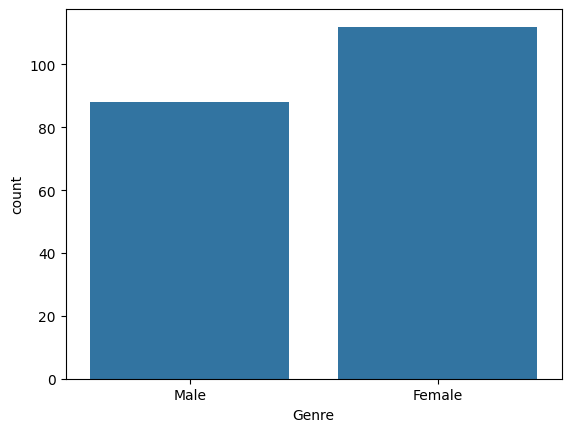

In [41]:
sns.countplot(x='Genre', data=df);

In [42]:
df.shape

(200, 5)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [43]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [44]:
df.rename(columns={'CustomerID': 'identificacao'}, inplace=True)

In [45]:
df.rename(columns={'Genre': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)

In [46]:
df.rename(columns={'Annual Income (k$)': 'rendimento','Spending Score (1-100)':'pontuacao'}, inplace=True)

In [47]:
df.head(3)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


**Valores Missing (NAN)**

In [48]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

identificacao    0
genero           0
idade            0
rendimento       0
pontuacao        0
dtype: int64

**Análise dos tipos de atributos.**

In [49]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

identificacao     int64
genero           object
idade             int64
rendimento        int64
pontuacao         int64
dtype: object

**Dados Estatísticos**

In [50]:
df.describe()

,identificacao,idade,rendimento,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Análise dos outliers**

In [51]:
import plotly.express as px

In [52]:
boxplot = px.box(df, y="rendimento")
boxplot.show()

In [53]:
boxplot = px.box(df, y="idade")
boxplot.show()

In [54]:
boxplot = px.box(df, y="pontuacao")
boxplot.show()

## **PRÉ-PROCESSAMENTO**

In [55]:
df.head(2)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81


###**Excluir identificação do cliente**

In [56]:
df2 = df.drop(labels = 'identificacao', axis = 1)

In [57]:
df2.head(2)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81


###**Transformar variáveis categóricas em numéricas**

In [58]:
df2['genero'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [59]:
df2.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


###**Escalonamento**


Escalonamento em machine learning refere-se ao processo de ajustar os dados para que todas as variáveis (também chamadas de features) fiquem na mesma escala. Isso é importante porque muitos algoritmos de machine learning podem ser influenciados pelas diferenças nas magnitudes das variáveis.

Imagine que você está tentando prever o preço de casas com base em duas variáveis: a área em metros quadrados (que pode variar de 50 a 500 m²) e a idade da casa (que pode variar de 1 a 100 anos). Como a área tem valores muito maiores que a idade, ela pode acabar dominando o algoritmo, o que não é desejável.

Para evitar isso, aplicamos o escalonamento, que basicamente faz com que todas as variáveis tenham valores comparáveis, como entre 0 e 1, ou com média 0 e desvio padrão 1. Isso ajuda o algoritmo a tratar todas as variáveis de forma mais equilibrada.

Existem duas formas comuns de fazer o escalonamento:

**Normalização (Min-Max Scaling)**: Transforma os valores para que fiquem entre um intervalo, normalmente entre 0 e 1.

**Padronização (Standard Scaling)**: Transforma os dados para que tenham média 0 e desvio padrão 1.

O escalonamento ajusta os dados para que todas as variáveis contribuam de forma justa no aprendizado do modelo

In [60]:
#importando o metodo de padronizacao

from sklearn.preprocessing import StandardScaler

In [61]:
#nomeando o metodo de escala
escala = StandardScaler()

#fazendo o escalonamento
df2_esc = escala.fit_transform(df2)

In [62]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## K-MEANS


O K-Means é um algoritmo de agrupamento (clustering) em machine learning, amplamente utilizado para dividir um conjunto de dados em grupos (clusters) com base nas características dos dados. A ideia principal do K-Means é identificar padrões nos dados, agrupando pontos semelhantes entre si.



Aplicações do K-Means:

**Segmentação de clientes**: Agrupa clientes com comportamentos de compra semelhantes.

**Compressão de imagens**: Reduz a quantidade de cores em uma imagem, agrupando pixels semelhantes.

**Agrupamento de documentos**: Agrupa textos ou artigos com base em temas semelhantes.



## **K-MEANS COM DOIS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [63]:
df2

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [64]:
#selecionando 2 atributos

dados = df2.iloc[:, [2,3]].values

In [65]:
dados

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Elbow Method**

O método do cotovelo (elbow method) é uma técnica usada para determinar o número ideal de clusters (K) no algoritmo de K-Means. A ideia é ajudar a escolher a quantidade certa de grupos para os dados, evitando que o número seja muito pequeno ou grande.


#### WCSS


WCSS (Within-Cluster Sum of Squares), ou Soma dos Quadrados Dentro do Cluster, é uma métrica utilizada no algoritmo de K-Means para avaliar a qualidade dos agrupamentos. Ele mede o quão compactos os clusters estão, ou seja, o quanto os pontos dentro de cada cluster estão próximos de seus respectivos centróides.


Distância: A distância entre um ponto e seu centróide mede o quão "perto" ou "longe" esse ponto está do centro do cluster.

Quadrados: As distâncias são elevadas ao quadrado para evitar valores negativos e dar mais peso a pontos mais distantes.

Soma: Essas distâncias quadradas são somadas para cada ponto em todos os clusters.

In [66]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

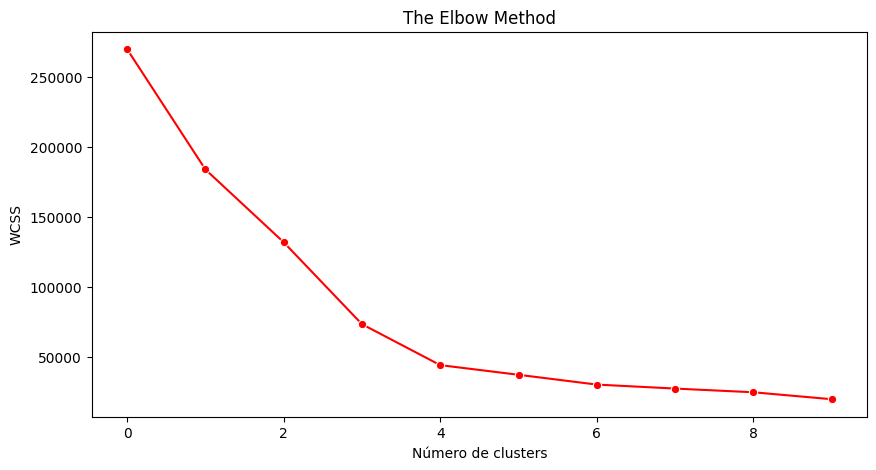

In [68]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [69]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [90]:
kmeans1 = kmeans.fit(dados)

In [71]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[26.30434783, 20.91304348],
       [48.26      , 56.48      ],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

In [72]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [73]:
dados[3,:]

array([16, 77], dtype=int64)

In [74]:
classificacao[3]

1

In [75]:
import plotly.express as px
import plotly.graph_objects as go

In [76]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Pontuação')
graf3.show()

In [77]:
#visualizar de forma tabelar de qual grupo determinado cliente faz parte
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,0
1,1
2,0
3,1
4,0
...,...
195,3
196,2
197,3
198,2


In [78]:
df3 = pd.concat([df, agrupamento],axis=1)
df3

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [79]:
df3.iloc[150 , :]

identificacao     151
genero           Male
idade              43
rendimento         78
pontuacao          17
Grupo               2
Name: 150, dtype: object

In [80]:
df3.loc[df3.identificacao == 92]

,identificacao,genero,idade,rendimento,pontuacao,Grupo
91,92,Male,18,59,41,1


In [81]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
2,3,Female,20,16,6,0
4,5,Female,31,17,40,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0
14,15,Male,37,20,13,0
16,17,Female,35,21,35,0
18,19,Male,52,23,29,0


In [82]:
grupo0.shape

(23, 6)

In [83]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,identificacao,genero,idade,rendimento,pontuacao,Grupo
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1
...,...,...,...,...,...,...
118,119,Female,51,67,43,1
119,120,Female,50,67,57,1
120,121,Male,27,67,56,1
121,122,Female,38,67,40,1


In [84]:
grupo1.shape

(100, 6)

## **K-MEANS COM TODOS ATRIBUTOS**

In [85]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [86]:
df2_esc.shape

(200, 4)

**Elbow Method**

In [97]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

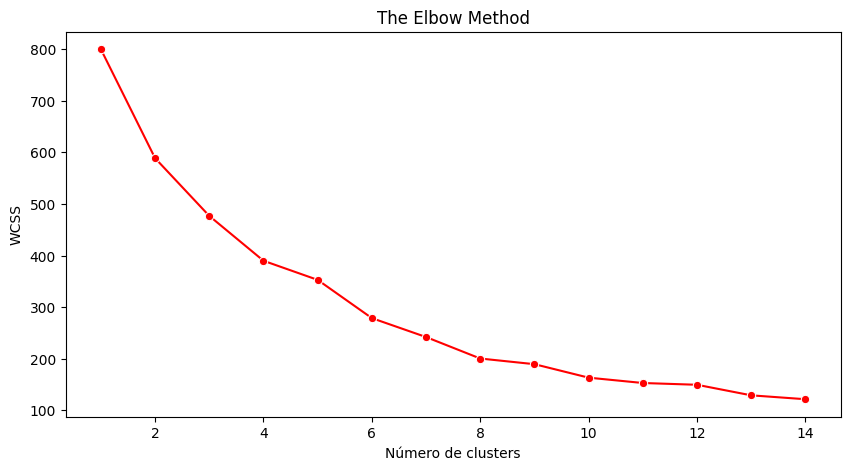

In [102]:
plt.figure(figsize=(10,5))
sns.lineplot( x=range(1,15),y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [94]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)


In [95]:
kmeans2 = kmeans.fit(df2_esc)

In [96]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[-0.88640526,  0.70849671, -0.00229017, -0.56133101],
       [ 0.04339047, -0.44191719,  0.99158305,  1.23950275],
       [ 1.12815215,  1.33075947, -0.48486081, -0.42786906],
       [ 1.12815215, -1.02205127, -0.75821082,  0.43783969],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355]])

#### Inversao de Escalonamento

Quando você aplica o escalonamento (usando algo como StandardScaler ou MinMaxScaler) nos seus dados antes de rodar o K-Means, as variáveis são transformadas para ficarem em uma escala comum (como entre 0 e 1, ou com média 0 e desvio padrão 1). No entanto, os centróides que o K-Means calcula estarão também nessa escala transformada.

Para interpretar os resultados de maneira mais compreensível e no contexto original dos dados, você pode reverter o escalonamento dos centróides, trazendo-os de volta à escala original dos dados.

In [103]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[-2.77555756e-16,  4.87222222e+01,  6.05000000e+01,
         3.57407407e+01],
       [ 4.61538462e-01,  3.26923077e+01,  8.65384615e+01,
         8.21282051e+01],
       [ 1.00000000e+00,  5.73928571e+01,  4.78571429e+01,
         3.91785714e+01],
       [ 1.00000000e+00,  2.46086957e+01,  4.06956522e+01,
         6.14782609e+01],
       [ 1.00000000e+00,  3.84736842e+01,  8.58947368e+01,
         1.42105263e+01],
       [ 1.66533454e-16,  2.59459459e+01,  4.22162162e+01,
         5.74594595e+01]])

In [104]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([3, 3, 5, 5, 5, 5, 0, 5, 2, 5, 2, 5, 0, 5, 2, 3, 5, 3, 2, 5, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 5, 2, 5, 2, 3, 0, 5, 0, 5, 0, 5, 0, 3, 2, 5,
       0, 5, 0, 5, 5, 5, 0, 3, 5, 2, 0, 2, 0, 2, 5, 2, 2, 3, 0, 0, 2, 3,
       0, 0, 3, 5, 2, 0, 0, 0, 2, 3, 0, 2, 5, 0, 2, 3, 2, 0, 5, 2, 0, 5,
       5, 0, 0, 3, 2, 0, 5, 3, 0, 5, 2, 3, 5, 0, 2, 3, 2, 5, 0, 2, 2, 2,
       2, 5, 0, 3, 5, 5, 0, 0, 0, 0, 3, 0, 0, 1, 5, 1, 4, 1, 2, 1, 4, 1,
       5, 1, 4, 1, 0, 1, 4, 1, 0, 1, 5, 1, 4, 1, 4, 1, 0, 1, 4, 1, 0, 1,
       0, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 0, 1,
       4, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1])

In [105]:
classificacao2[199]

1

In [106]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,3
1,3
2,5
3,5
4,5
...,...
195,1
196,0
197,1
198,4


In [107]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,5
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [108]:
df4.iloc[125 , :]

identificacao       126
genero           Female
idade                31
rendimento           70
pontuacao            77
Grupo                 1
Name: 125, dtype: object

In [109]:
df4.loc[df4.identificacao == 76]

,identificacao,genero,idade,rendimento,pontuacao,Grupo
75,76,Male,26,54,54,3


In [110]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0

,identificacao,genero,idade,rendimento,pontuacao,Grupo
6,7,Female,35,18,6,0
12,13,Female,58,20,15,0
22,23,Female,46,25,5,0
24,25,Female,54,28,14,0
26,27,Female,45,28,32,0
28,29,Female,40,29,31,0
34,35,Female,49,33,14,0
36,37,Female,42,34,17,0
38,39,Female,36,37,26,0
40,41,Female,65,38,35,0


In [111]:
grupo0.shape

(54, 6)

## **K-MEANS COM PCA**

O PCA (Principal Component Analysis) é uma técnica de redução de dimensionalidade. Ele transforma um conjunto de variáveis possivelmente correlacionadas em um novo conjunto de variáveis, chamadas de componentes principais, que são não correlacionadas. Esses componentes capturam a maior parte da variação nos dados originais.

Componentes principais: São combinações lineares das variáveis originais. O primeiro componente captura a maior parte da variação, o segundo componente captura a segunda maior parte, e assim por diante.
Redução de dimensionalidade: Ao escolher apenas os primeiros componentes principais (aqueles que explicam mais variação), o PCA permite trabalhar com menos dimensões, preservando as características mais importantes dos dados.

In [112]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [113]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [114]:
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components = 2)

In [116]:
df2_pca = pca.fit_transform(df2_esc)

In [117]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [118]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.33690046, 0.26230645])

contém os valores da razão de variância explicada por cada componente principal. Esses valores estão entre 0 e 1 e indicam a fração da variabilidade total dos dados que cada componente captura.

Componentes principais: São as direções nas quais os dados têm a maior variação.
Variância explicada: A fração da variação total que está contida em cada componente. Quanto maior a variância explicada de um componente, mais importante ele é para descrever a estrutura dos dados.

In [119]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.5992069019819846

**Elbow Method**

In [120]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

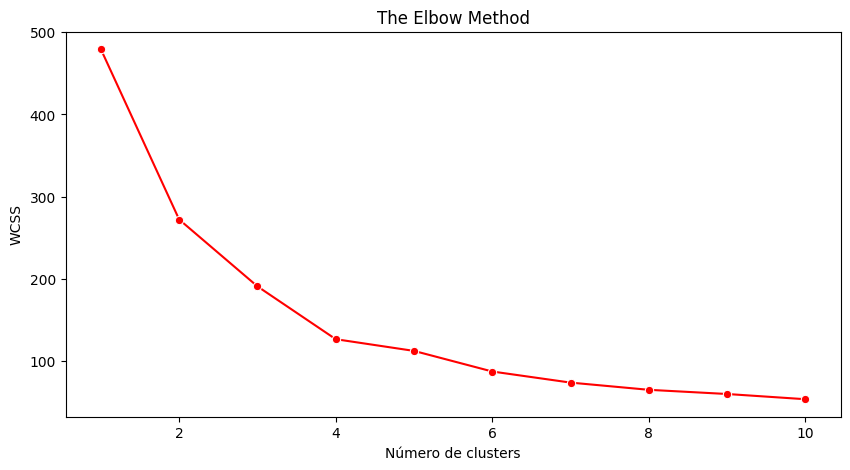

In [123]:
plt.figure(figsize=(10,5))
sns.lineplot(x= range(1, 11), y = wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [124]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [125]:
kmeans3 = kmeans.fit(df2_pca)

In [126]:
# Coordenadas dos Centróides
centroides = kmeans3.cluster_centers_
centroides

array([[ 0.59773908, -1.02135332],
       [-0.89924813,  1.20707643],
       [ 1.23620204,  0.6001392 ],
       [-1.17272864, -0.50410113]])

In [127]:
# Classificação dos dados
classificacao3 = kmeans3.labels_
classificacao3

array([3, 3, 0, 3, 0, 3, 0, 3, 2, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3,
       0, 3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 2, 0, 2, 3, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 3, 2, 0, 0, 0, 2, 1, 0, 2, 3, 0, 2, 2, 2, 0, 3, 2, 0, 3,
       3, 0, 0, 1, 2, 0, 3, 1, 0, 3, 2, 1, 3, 0, 2, 1, 2, 3, 0, 2, 2, 2,
       2, 3, 0, 1, 3, 3, 0, 0, 0, 0, 1, 0, 3, 1, 3, 3, 2, 1, 2, 1, 2, 1,
       3, 3, 2, 3, 0, 1, 2, 3, 2, 1, 3, 3, 2, 1, 2, 3, 0, 1, 2, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [128]:
classificacao3[2]

0

In [129]:
import plotly.express as px
import plotly.graph_objects as go

In [130]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao3)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [131]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Grupo'])
agrupamento3

,Grupo
0,3
1,3
2,0
3,3
4,0
...,...
195,1
196,2
197,1
198,2


In [132]:
df5 = pd.concat([df, agrupamento3],axis=1)
df5

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [133]:
df5.iloc[125 , :]

identificacao       126
genero           Female
idade                31
rendimento           70
pontuacao            77
Grupo                 3
Name: 125, dtype: object

In [134]:
df5.loc[df5.identificacao == 76]

,identificacao,genero,idade,rendimento,pontuacao,Grupo
75,76,Male,26,54,54,1


In [135]:
grupo0 = df5.loc[df5.Grupo == 0]
grupo0

,identificacao,genero,idade,rendimento,pontuacao,Grupo
2,3,Female,20,16,6,0
4,5,Female,31,17,40,0
6,7,Female,35,18,6,0
12,13,Female,58,20,15,0
14,15,Male,37,20,13,0
16,17,Female,35,21,35,0
18,19,Male,52,23,29,0
20,21,Male,35,24,35,0
22,23,Female,46,25,5,0
24,25,Female,54,28,14,0


In [136]:
grupo0.shape

(48, 6)

## **ALGORITMO HIERÁRQUICO COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
df2.head()

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

**Componentes Principais**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
df2_pca = pca.fit_transform(df2_esc)

In [ ]:
df2_pca

**Dendograma**

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dendrograma = dendrogram(linkage(df2_pca, method = 'complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')
classificacao4 = hier.fit_predict(df2_pca)

In [ ]:
classificacao4

In [ ]:
import plotly.express as px

In [ ]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao4)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

**Agrupamento**

In [ ]:
agrupamento4 = pd.DataFrame(classificacao4, columns = ['Grupo'])
agrupamento4

In [ ]:
df6 = pd.concat([df, agrupamento4],axis=1)
df6

In [ ]:
df6.loc[df6.identificacao == 22]

In [ ]:
grupo2 = df6.loc[df6.Grupo == 2]
grupo2

## **ALGORITMO HIERÁRQUICO: todos atributos**






In [ ]:
df2.head()

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

**Dendograma**

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dendrograma = dendrogram(linkage(df2_esc, method = 'average'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hier = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage = 'average')
classificacao5 = hier.fit_predict(df2_esc)

In [ ]:
classificacao5

**Agrupamento**

In [ ]:
agrupamento5 = pd.DataFrame(classificacao5, columns = ['Grupo'])
agrupamento5

In [ ]:
df7 = pd.concat([df, agrupamento5],axis=1)
df7

In [ ]:
df7.loc[df7.identificacao == 131]

In [ ]:
grupo4 = df7.loc[df7.Grupo == 6]
grupo4.head(2)

In [ ]:
grupo4.shape

## **ALGORITMO DBSCAN COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

**Componentes Principais**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
df2_pca = pca.fit_transform(df2_esc)

In [ ]:
df2_pca

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.32, min_samples=4)
dbscan.fit(df2_pca)

In [ ]:
classificacao6 = dbscan.labels_
classificacao6

In [ ]:
import plotly.express as px

In [ ]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao6)
graf.update_layout(width=800,height=500,title_text='Agrupamento DBSCAN')
graf.show()

**Agrupamento**

In [ ]:
agrupamento6 = pd.DataFrame(classificacao6, columns = ['Grupo'])
agrupamento6

In [ ]:
df8 = pd.concat([df, agrupamento6],axis=1)
df8

In [ ]:
df8.loc[df8.identificacao == 5]

In [ ]:
ruido = df8.loc[df8.Grupo == -1]
ruido

In [ ]:
ruido.shape

## **ALGORITMO DBSCAN: todos atributos**

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.73, min_samples=4)
dbscan.fit(df2_esc)

In [ ]:
classificacao7 = dbscan.labels_
classificacao7

**Agrupamento**

In [ ]:
agrupamento7 = pd.DataFrame(classificacao7, columns = ['Grupo'])
agrupamento7

In [ ]:
df9 = pd.concat([df, agrupamento7],axis=1)
df9

In [ ]:
df9.loc[df9.identificacao == 127]

In [ ]:
ruido = df9.loc[df9.Grupo == -1]
ruido

In [ ]:
ruido.shape

In [ ]:
grupo = df9.loc[df9.Grupo == 1]
grupo.shape

## **ALGORITMO MEANSHIFT COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

**Componentes Principais**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
df2_pca = pca.fit_transform(df2_esc)

In [ ]:
df2_pca

**MeanShift**

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
mean = MeanShift(bandwidth=1, cluster_all=True)

In [ ]:
mean.fit(df2_pca)

In [ ]:
classificacao8 = mean.labels_
classificacao8

In [ ]:
import plotly.express as px

In [ ]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao8)
graf.update_layout(width=800,height=500,title_text='Agrupamento MeanShift')
graf.show()

**Agrupamento**

In [ ]:
agrupamento8 = pd.DataFrame(classificacao8, columns = ['Grupo'])
agrupamento8

In [ ]:
df9 = pd.concat([df, agrupamento8],axis=1)
df9

In [ ]:
df9.loc[df9.identificacao == 19]

In [ ]:
ruido = df9.loc[df9.Grupo == -1]
ruido

In [ ]:
grupo = df9.loc[df9.Grupo == 3]
grupo.shape

## **ALGORITMO MEANSHIFT: todos atributos**

In [ ]:
df2_esc

In [ ]:
df2

In [ ]:
df2_esc.shape

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
mean = MeanShift(bandwidth=1.5, cluster_all=True)

In [ ]:
mean.fit(df2_esc)

In [ ]:
classificacao9 = mean.labels_
classificacao9

**Agrupamento**

In [ ]:
agrupamento9 = pd.DataFrame(classificacao9, columns = ['Grupo'])
agrupamento9

In [ ]:
df10 = pd.concat([df, agrupamento9],axis=1)
df10

In [ ]:
df10.loc[df10.identificacao == 45]

In [ ]:
grupo = df10.loc[df10.Grupo == 4]
grupo.shape

## **K-PROTOTYPES**

Algoritmo para agrupamento de dados mistos (categóricos e numéricos). Documentação: https://pypi.org/project/kmodes/

---



In [ ]:
df.head()

In [ ]:
dados= df[['genero','idade','rendimento', 'pontuacao']]
dados

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
kproto = KPrototypes(n_clusters= 4)

In [ ]:
kproto1 = kproto.fit_predict(dados, categorical=[0])

In [ ]:
kproto1

In [ ]:
kproto1[4]

In [ ]:
agrupamento = pd.DataFrame(kproto1, columns = ['grupo'])
agrupamento

In [ ]:
df_final = pd.concat([df, agrupamento],axis=1)

In [ ]:
df_final.head()

In [ ]:
df_final.iloc[132 , :]

In [ ]:
grupo = df_final.loc[df_final.grupo ==3]
grupo.head()

In [ ]:
grupo.shape

## **K-MODES**

Algoritmo para agrupamento de dados categóricos. Documentação: https://pypi.org/project/kmodes/

https://www.kaggle.com/datasets/yukeshmarudhasalam/bankmarketing

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cursos_Udemy/Machine_Learning_com_Python/bankmarketing.csv',
                    sep=',', encoding='iso-8859-1')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

**Variáveis**

**age** : idade (numérica)

**job** : tipo de trabalho (categorias: 'admin.','blue-collar','entrepreneur(empreendedor)','housemaid','management (gestão)','retired (aposentado)','self-employed (autônomo)','services','student','technician','unemployed (desempregado)','unknown')

**marital** : estado civil (categorias: 'divorced','married','single','unknown'; obs.: 'divorced' significa divorciado ou viúvo (a))

**education**: nível escolar (categorias: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

**default**: inadimplência (categorias: 'no','yes','unknown')

**housing**: crédito de habitação (categorias: 'no','yes','unknown')

**loan**: empréstimo pessoal (categorias: 'no','yes','unknown')

**contact**: contato (categorias: 'cellular','telephone')

**month**: último mês de contato (categorias: 'jan', 'feb', 'mar', 'april', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')

**day_of_week**: último dia de contato (categorical: 'mon','tue','wed','thu','fri')

**poutcome:** resultado do marketing anterior (categorical: 'failure','nonexistent','success')

In [ ]:
df2 = df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
df2

In [ ]:
df3 = df2.copy()

In [ ]:
df3['faixa_idade'] = pd.cut(df3['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [ ]:
df3  = df3.drop('age',axis = 1)

In [ ]:
df3.head(30)

In [ ]:
df3.dtypes

In [ ]:
df3.isnull().sum()

### **Pré-processamento**

**Transformação para codificação numérica**

In [ ]:
from sklearn import preprocessing
df4 = df3.apply(preprocessing.LabelEncoder().fit_transform)
df4.head()

### **Instalação**

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kmodes import KModes

In [ ]:
?KModes

### **NÚMERO DE CLUSTERS "IDEAL"**

In [ ]:
custo = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, n_init = 2, verbose=1)
    kmode.fit_predict(df4)
    custo.append(kmode.cost_)

In [ ]:
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,10,1)])
plt.plot(y,custo);

In [ ]:
kmd = KModes(n_clusters=4, verbose=1)
kmd1 = kmd.fit_predict(df4)

In [ ]:
kmd1

In [ ]:
kmd1[40000]

In [ ]:
agrupamento = pd.DataFrame(kmd1, columns = ['grupo'])
agrupamento

In [ ]:
df5 = pd.concat([df2, agrupamento],axis=1)

In [ ]:
df5.head()

In [ ]:
df5.iloc[33284 , :]

In [ ]:
grupo = df5.loc[df5.grupo == 3]
grupo.head()

In [ ]:
grupo.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df5['job'], order=df5['job'].value_counts().index, hue=df5['grupo'])
plt.show()

## **DESAFIO 5**

DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE AGRUPAMENTO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/harrywang/wine-dataset-for-clustering